### IMPORTANDO BIBLIOTECAS/MÓDULOS

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

### CRIANDO SÉRIE TEMPORAL

In [67]:
np.random.seed(0)
data = np.random.normal(3000,1,100)
serie = pd.DataFrame(data, columns=['Serie'])

### ANALISANDO SÉRIE TEMPORAL

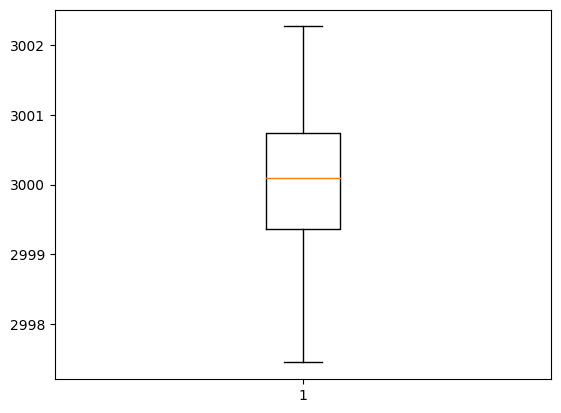

In [68]:
plt.boxplot(serie)
plt.show()

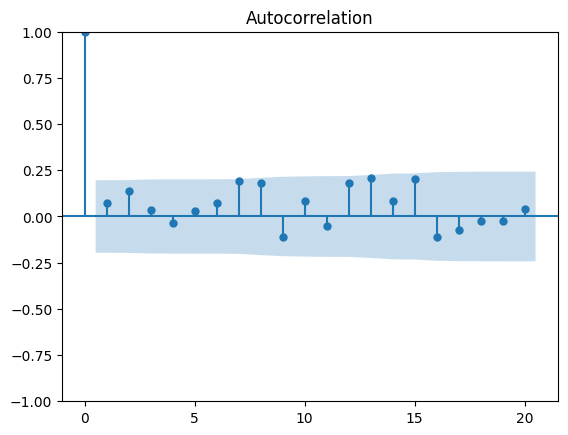

In [69]:
plot_acf(serie, lags=20)
plt.show()

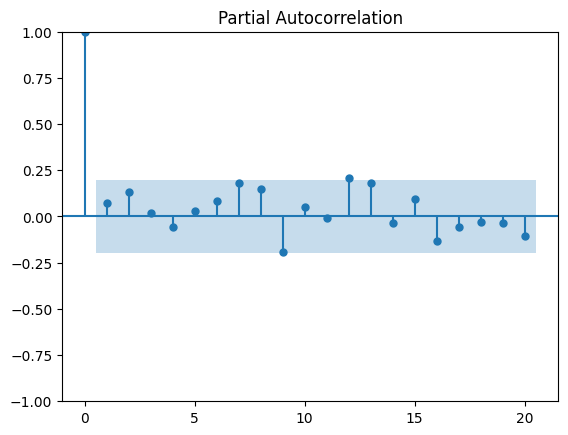

In [70]:
plot_pacf(serie, lags=20)
plt.show()

### DEFININDO BASE TREINO E TESTE

In [71]:
Total_Series = int(len(serie) * 0.5)
Treino = serie['Serie'][:Total_Series]
Teste = serie['Serie'][Total_Series:]

print(Treino.shape)
print(Teste.shape)

(50,)
(50,)


### CONFIGURANDO E TREINANDO MODELOS ARIMA E SARIMAX

In [131]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sa

order_arima = (30,0,1)
order_sa = (15,1,1)
seasonal_order = (3,0,1,16)

modelo_sa = sa.tsa.SARIMAX(Treino, order=order_sa, seasonal_order=seasonal_order)
modelo = ARIMA(Treino,order=order_arima)

modelo_fit = modelo.fit()
modelo_sa_fit = modelo_sa.fit()

c:\Users\User\anaconda3\envs\base2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\User\anaconda3\envs\base2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\User\anaconda3\envs\base2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### AVALIANDO TREINAMENTO DOS MODELOS ARIMA E SARIMAX

In [73]:
residuals = pd.DataFrame(modelo_fit.resid)
residuals_sa = pd.DataFrame(modelo_sa_fit.resid)

In [74]:
print(modelo_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Serie   No. Observations:                   50
Model:                ARIMA(11, 0, 1)   Log Likelihood                 -70.574
Date:                Fri, 01 Sep 2023   AIC                            169.147
Time:                        14:13:36   BIC                            195.916
Sample:                             0   HQIC                           179.341
                                 - 50                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3000.1693      0.562   5336.124      0.000    2999.067    3001.271
ar.L1          0.6087      0.550      1.107      0.269      -0.470       1.687
ar.L2          0.1873      0.255      0.734      0.4

In [75]:
print(modelo_sa_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Serie   No. Observations:                   50
Model:             SARIMAX(11, 0, 1)x(4, 0, 1, 12)   Log Likelihood                   0.000
Date:                             Fri, 01 Sep 2023   AIC                             36.000
Time:                                     14:13:36   BIC                             70.416
Sample:                                          0   HQIC                            49.106
                                              - 50                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9825   9.41e-09  -1.04e+08      0.000      -0.982      -0.982
ar.L2          3.9943      

c:\Users\User\anaconda3\envs\base2\lib\site-packages\statsmodels\tsa\stattools.py:1363: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
c:\Users\User\anaconda3\envs\base2\lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


<Axes: ylabel='Density'>

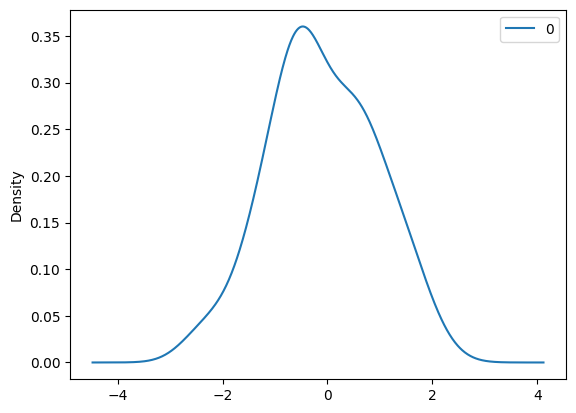

In [76]:
residuals.plot(kind='kde')

<Axes: ylabel='Density'>

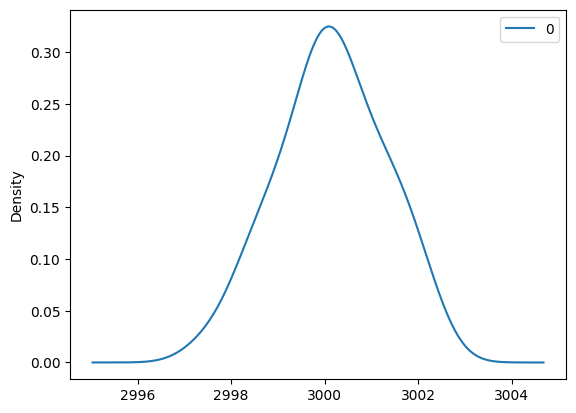

In [77]:
residuals_sa.plot(kind='kde')

### REALIZANDO PREVISÕES E COMPARANDO COM A BASE

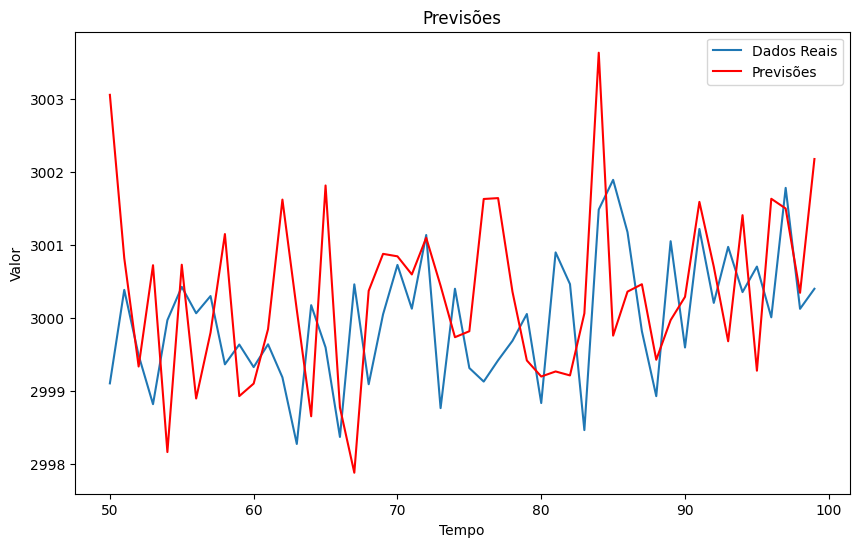

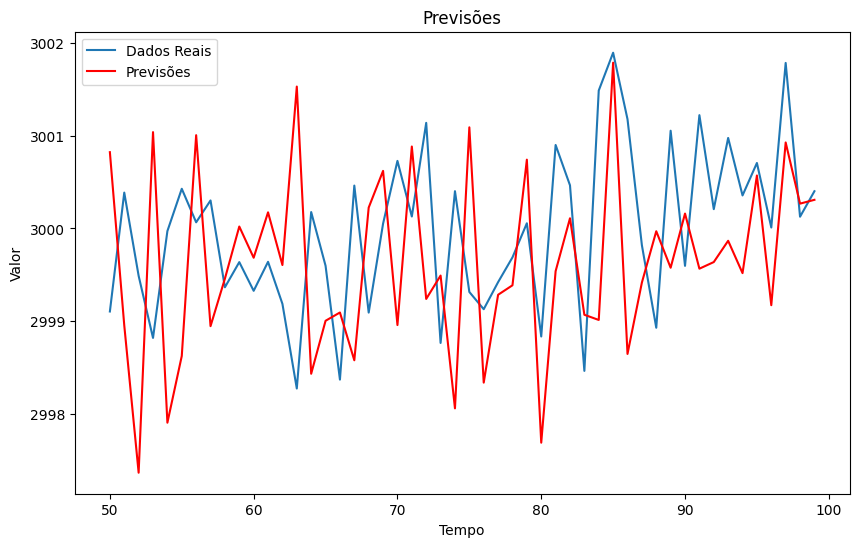

In [138]:
n_forecast = len(Teste)
forecast = modelo_fit.forecast(steps=n_forecast)
forcast_sa = modelo_sa_fit.forecast(steps=n_forecast)

modelos = [forecast,forcast_sa]

for modelo in modelos:

    plt.figure(figsize=(10, 6))
    plt.plot(Teste.index, Teste, label='Dados Reais')
    plt.plot(Teste.index, modelo, color='red', label='Previsões')
    plt.title('Previsões')
    plt.xlabel('Tempo')
    plt.ylabel('Valor')
    plt.legend()